<a href="https://colab.research.google.com/github/Shravaniiii/assignment1-701/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install otter-grader


Introduction to Pandas and Scikit-Learn

Pandas is a powerful data manipulation and analysis library for Python. It provides data structures like DataFrames and Series that allow for efficient handling of structured data. Pandas is particularly useful for tasks such as reading and writing data in various formats, data cleaning, merging datasets, and performing complex operations on data.

Scikit-learn, on the other hand, is a machine learning library for Python. It provides a wide range of supervised and unsupervised learning algorithms, as well as tools for model selection, evaluation, and preprocessing. Scikit-learn is designed to be user-friendly and efficient, making it a popular choice for both beginners and experienced data scientists.

Together, Pandas and Scikit-learn form a powerful combination for data analysis and machine learning tasks. Pandas is often used to prepare and manipulate data, which can then be fed into Scikit-learn models for training and prediction.

In this assignment, we'll start with the fundamentals of data loading/manipulation in pandas, then move on to basics of scikit-learn.

## **Pandas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's load the Census Income dataset which is available on the UCI ML Dataset Page.

The goal is to predict whether a person's income was greater than $50K based on 1994 census data.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


After running this code, you will be prompted to authorize Google Colab to access your Google Drive account. Once authorized, your Drive will be mounted at /content/drive/My Drive/, allowing you to easily read and write files directly to your Drive from within this notebook. This helps to keep your data and files persistent across different Colab sessions.


In [3]:
!ls /content/drive/MyDrive

 adult.csv
'Colab Notebooks'
'Common Workflow for Contributing to Open Source on GitHub1.gdoc'
'Git Cheatsheet: Merge vs Rebase.gdoc'


This command lists the contents of the mounted Google Drive directory (MyDrive). It helps you verify that your files and folders are accessible in the Colab environment. For example, here you can see files like adult.csv and folders such as Colab Notebooks

In [4]:
!ls "/content/drive/MyDrive/Colab Notebooks"

adult.csv  assignment1.ipynb  Untitled0.ipynb


In [60]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/')
print(os.getcwd())  # verify current directory

df = pd.read_csv('adult.csv')  # now just use filename

/content/drive/MyDrive/Colab Notebooks


In this code, we use os.chdir() to change the current working directory to the folder where our dataset (adult.csv) is stored. This way, when we load the CSV file using pd.read_csv(), we only need to specify the filename — without the full file path. It simplifies file handling and makes the code cleaner and easier to read.

The print(os.getcwd()) command confirms that our working directory has successfully changed.

This command lists all the files inside the “Colab Notebooks” folder of your Google Drive.

In [62]:
df = pd.read_csv('adult.csv')

In [72]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In the above code, we specify the full file path to the adult.csv dataset stored inside the "Colab Notebooks" folder on Google Drive. Then, we load the dataset into a pandas DataFrame called df and print the first five records. This helps us quickly inspect the structure and sample data of the dataset.

# **Part 1: Data Loading and pre-processing**

**Question 1a**: Write a function get_rows_and_columns that takes as input a CSV filename, loads this file into a Pandas dataframe, and returns a tuple of the number of rows and columns in the dataframe.

In [8]:
def get_rows_and_columns(file_path):
    df = pd.read_csv(file_path)
    return df.shape

In [9]:
get_rows_and_columns(file_path)

(48842, 15)

In [ ]:
grader.check("q1a")


**Question 1b:** Write a function compute_missing_percentage that converts '?' to pd.NA and returns the percentage of missing data (i.e., NaNs) for each column in the dataset.

The term pd.NA is the way to represent missing values (not available) in Pandas.

In [73]:
def compute_missing_percentage(df):
    df2 = df.replace('?', pd.NA)
    missing_pct = df2.isna().mean() * 100
    return missing_pct


In [74]:
df = pd.read_csv('adult.csv')

In [75]:
compute_missing_percentage(df)

,0
age,0.000000
workclass,5.730724
fnlwgt,0.000000
education,0.000000
educational-num,0.000000
marital-status,0.000000
occupation,5.751198
relationship,0.000000
race,0.000000
gender,0.000000


In [ ]:
grader.check("q1b")

**Question 1c:** Write a function unique_occupation that returns the number of unique occupation present in the dataset.

In [14]:
def unique_occupation(df):
    # Assuming 'occupation' is a column in the dataframe
    return df['occupation'].nunique()

In [15]:
unique_occupation(df)

15

In [ ]:
grader.check("q1c")

**Question 1d:** Write a function categorical_column_with_max_unique_values that identifies and returns the index of the column with maximum number of distinct categorical values in the dataset.

In [16]:
def categorical_column_with_max_unique_values(df):
    # Select only object (categorical) columns
    cat_cols = df.select_dtypes(include='object')

    # Calculate unique counts for each categorical column
    unique_counts = cat_cols.nunique()

    # Find column name with max unique values
    max_col = unique_counts.idxmax()

    # Return the integer index of that column (in full df.columns)
    return df.columns.get_loc(max_col)



In [17]:
categorical_column_with_max_unique_values(df)

13

In [ ]:
grader.check("q1d")

# **Part 2: Exploratory data analysis and visualizations**

**Question 2a:** Write a function plot_categorical_distribution to plot the distribution of the column 'education' as a histogram.

You can use Pandas .plot() method for this. Look at the DataFrame .value_counts method as well. See class examples for how to add labels and titles.

In [20]:
def plot_categorical_distribution(df):
    counts = df['education'].value_counts().sort_index()
    counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.title('Distribution of Education')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

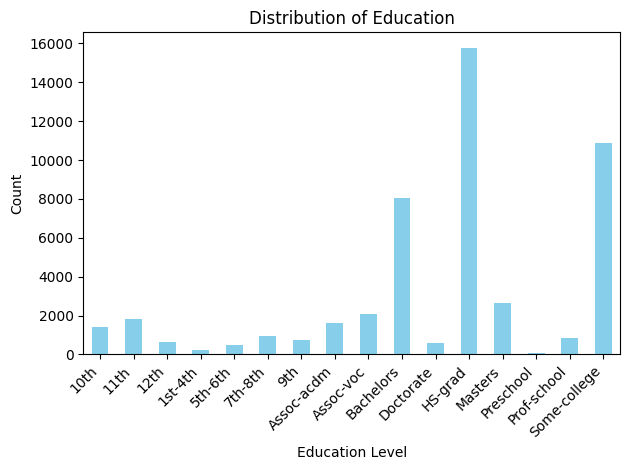

In [21]:
plot_categorical_distribution(df)


**Question 2b:** Write a function plot_age_hours_scatter that creates a scatter plot of 'age' vs 'hours-per-week', coloring points by 'income'.

You'll want to look at MatPlotLib's pyplot.scatter() for this one.

In [22]:
def plot_age_hours_scatter(df):
    colors = {'<=50K': 'blue', '>50K': 'red'}
    plt.figure(figsize=(8,6))
    for income_level, color in colors.items():
        subset = df[df['income'] == income_level]
        plt.scatter(subset['age'], subset['hours-per-week'], c=color, label=income_level, alpha=0.5, edgecolors='w', s=50)
    plt.xlabel('Age')
    plt.ylabel('Hours per Week')
    plt.title('Age vs Hours per Week Colored by Income')
    plt.legend(title='Income')
    plt.tight_layout()
    plt.show()

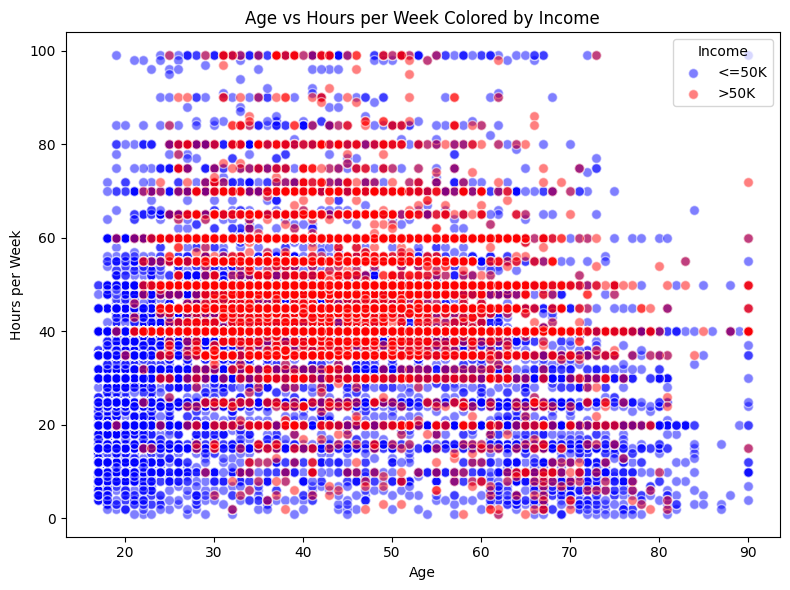

In [23]:
plot_age_hours_scatter(df)


**Question 2c:** Write a function plot_income_by_marital_status which plots a stacked bar chart that shows the proportion of income levels for each 'marital-status' category.

In [24]:
def plot_income_by_marital_status(df):
    crosstab = pd.crosstab(df['marital-status'], df['income'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, color=['blue', 'red'], figsize=(10,6))
    plt.ylabel('Proportion')
    plt.title('Proportion of Income Levels by Marital Status')
    plt.legend(title='Income')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

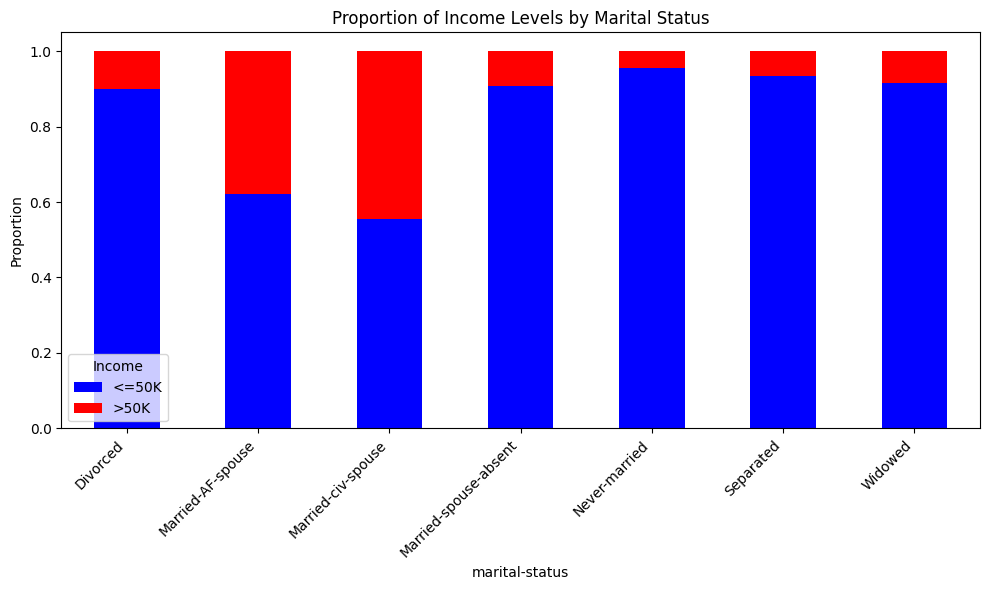

In [25]:
plot_income_by_marital_status(df)

# **Part 3: Advanced Pandas Operations**

**Question 3a:** Write a function education_stats that returns a dataframe with mean 'age' and median 'hours-per-week' categorized on the 'education' level.

In [26]:
def education_stats(df):
    grouped = df.groupby('education').agg({
        'age': 'mean',
        'hours-per-week': 'median'
    }).rename(columns={
        'age': 'mean_age',
        'hours-per-week': 'median_hours_per_week'
    })
    return grouped

In [27]:
education_stats(df)

,mean_age,median_hours_per_week
education,,
10th,37.902808,40.0
11th,32.141832,40.0
12th,32.235921,40.0
1st-4th,46.639676,40.0
5th-6th,43.585462,40.0
7th-8th,49.525654,40.0
9th,40.902116,40.0
Assoc-acdm,37.777014,40.0
Assoc-voc,38.651140,40.0


In [ ]:
grader.check("q3a")


**Question 3b:** Write a function calculate_most_popular_occupation that returns a dataframe of the most popular occupation for each 'native-country' and order them in descending order.italicized text

In [67]:
import pandas as pd
df = pd.read_csv('adult.csv')  # Load full original data
popular_occ_df = calculate_most_popular_occupation(df)
print(popular_occ_df.head())

  native-country       occupation  count
0  United-States  Exec-managerial   5606
1              ?   Prof-specialty    164
2         Mexico    Other-service    160
3          India   Prof-specialty     57
4    Philippines     Adm-clerical     56


In [76]:
def calculate_most_popular_occupation(df):
    # Ensure required columns exist
    required_cols = ['native-country', 'occupation']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"DataFrame missing required column: {col}")

    # Group by native-country and occupation and count the occurrences
    counts = df.groupby(['native-country', 'occupation']).size().reset_index(name='count')

    # For each native-country, get the index of the occupation with the highest count
    idx = counts.groupby('native-country')['count'].idxmax()

    # Select rows corresponding to the most popular occupation per native-country
    popular_occupations = counts.loc[idx]

    # Sort descending by count
    popular_occupations = popular_occupations.sort_values(by='count', ascending=False).reset_index(drop=True)

    return popular_occupations

In [77]:
calculate_most_popular_occupation(df)

,native-country,occupation,count
0,United-States,Exec-managerial,5606
1,?,Prof-specialty,164
2,Mexico,Other-service,160
3,India,Prof-specialty,57
4,Philippines,Adm-clerical,56
5,El-Salvador,Other-service,56
6,Canada,Prof-specialty,41
7,China,Prof-specialty,40
8,Germany,Prof-specialty,40
9,England,Exec-managerial,34


In [ ]:
grader.check("q3b")

**Question 3c:** Write a function workclass_by_income that returns a dataframe of the top 5 workclass with the highest number of people having income >50K

In [31]:
def workclass_by_income(df):
    # Filter for income >50K
    filtered = df[df['income'] == '>50K']
    # Count the number of people per workclass
    counts = filtered['workclass'].value_counts().head(5)
    # Convert to a dataframe for nice output
    result = counts.reset_index()
    result.columns = ['workclass', 'count']
    return result

In [32]:
workclass_by_income(df)

,workclass,count
0,Private,7387
1,Self-emp-not-inc,1077
2,Self-emp-inc,938
3,Local-gov,927
4,Federal-gov,561


In [ ]:
grader.check("q3c")


# **Scikit-learn**

In [33]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

df_new = df.drop(columns=['native-country', 'fnlwgt']).dropna()


In this part, we'll implement logistic regression using scikit-learn. Logistic regression is used when trying to predict a binary outcome (0 or 1, True or False, etc.) We will go over the details of logistic regression in details later in the course.

Here, we will try to predict income (>50k or <= 50k>) and follow standard ML procedures for data pre-processing. You can use scikit-learn's documentation, the lecture notes on scikit-learn or online resources for guidance.

**From here on use the 'df_new' variable instead of 'df'**
We saw in lecture that models are trained on the 'training' set and evaluated on unseen data on the 'testing' set. The dataset has 'feature' (X_train, X_test) and the 'outcome' (y_train, y_test) variables.

**Question 4a:** Write a function called split_data that takes a dataframe as its only parameter, splits it into training and test splits and returns them. Use 20% for the testing set.

Use train_test_split to produce the splits. Provide a random_state of 42 for reproducibility.

split_data should return 4 things: X_train, X_test y_train and y_test. To do that, you need to pass in the X and the y (income column) to train_test_split.

In [34]:
def split_data(df):
    X = df.drop(columns=['income'])
    y = df['income']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    return X_train, X_test, y_train, y_test

In [35]:
X_train, X_test, y_train, y_test = split_data(df_new)

In [ ]:
grader.check("q4a")


**Question 4b:** Write a function preprocess_data that takes X_train, y_train, X_test, and y_test as input (the splits we created earlier!) and does the following:

Scale the numerical columns using sklearn's MinMaxScaler to the range [0,1] for both train and test sets

Replace "<=50K" with 0 and ">50K" with 1 in both y_train and y_test

One-hot encode the categorical columns for both train and test sets. Check the next cell for some hints!

The function should then return the preprocessed X_train, y_train, X_test, and y_test

Refer to the material below and sklearn course notes for help!

One hot encoding is a way of turning textual data into numbers, so that models can work with them.

Pandas has a method called pd.get_dummies() that can do one-hot encoding.

Let's illustrate with an example. Let's say we are describing 4 people, each with attribute 'Gender' and 'City' where they reside.

Create a dictionary with 'City' and 'Gender' keys, each with a length 4 list.

In [38]:
data = {'City': ['New York', 'Los Angeles', 'New York', 'Chicago'],
        'Gender': ['Female', 'Male', 'Male', 'Female']}
print(data)

{'City': ['New York', 'Los Angeles', 'New York', 'Chicago'], 'Gender': ['Female', 'Male', 'Male', 'Female']}


We can give that to Pandas pd.DataFrame() and it will create a DataFrame with a City column and a Gender column.

In [41]:
df = pd.DataFrame(data)
print(df)

          City  Gender
0     New York  Female
1  Los Angeles    Male
2     New York    Male
3      Chicago  Female


Now we can call pd.get_dummies with the dataframe and it will convert each categorical column into a set of columns with each category and column entries of True or False (e.g. 1 or 0).

In [42]:
df_encoded = pd.get_dummies(df, columns=['City', 'Gender'])

In [43]:
print(df_encoded)

   City_Chicago  City_Los Angeles  City_New York  Gender_Female  Gender_Male
0         False             False           True           True        False
1         False              True          False          False         True
2         False             False           True          False         True
3          True             False          False           True        False


In [71]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def preprocess_data(X_train, X_test, y_train, y_test):
    # Identify numeric and categorical columns
    numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X_train.select_dtypes(include=['object']).columns

    # Scale numeric columns
    scaler = MinMaxScaler()
    X_train_num = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]),
                               columns=numeric_cols, index=X_train.index)
    X_test_num = pd.DataFrame(scaler.transform(X_test[numeric_cols]),
                              columns=numeric_cols, index=X_test.index)

    # One-hot encode categorical columns
    X_train_cat = pd.get_dummies(X_train[categorical_cols], columns=categorical_cols)
    X_test_cat = pd.get_dummies(X_test[categorical_cols], columns=categorical_cols)

    # Align columns to match train and test (filling missing columns with 0)

    X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='outer', axis=1, fill_value=0)

    # Concatenate numeric and categorical parts back
    X_train_processed = pd.concat([X_train_num, X_train_cat], axis=1)
    X_test_processed = pd.concat([X_test_num, X_test_cat], axis=1)

    # Encode y to 0/1 labels as 1D Series
    y_train_enc = y_train.replace({'<=50K': 0, '>50K': 1}).astype(int)
    y_test_enc = y_test.replace({'<=50K': 0, '>50K': 1}).astype(int)

    return X_train_processed, y_train_enc, X_test_processed, y_test_enc

Explanation:

We first detect which columns are numeric and which are categorical (object).
We scale the numeric columns with MinMaxScaler applied to both train and test sets (test transformed with the train-fitted scaler).
The categorical columns are one-hot encoded separately for training and testing sets.
Since train and test may have different categorical columns because some categories might not appear in both sets, we align their columns and fill missing columns with 0.
Finally, we encode the target variable (y_train and y_test) converting string labels <=50K and >50K to 0 and 1 respectively.
The function returns the preprocessed splits ready to be used for model training and evaluation.

In [ ]:
grader.check("q4d")

Let's get to training! Remember, we're trying to predict whether income is more then 50k (>50k), or less than or equal to (<=50k).

**Question 4c:** Write a function called train_model that takes the training splits (X_train and y_train) as its parameters.

Initialize the logistic regression model
Fit it to our data. (Training step)
At the end, return the fitted model.

You can refer to LogisticRegression

In [50]:
def train_model(X_train, y_train):
    # Initialize the logistic regression model (increase max_iter if convergence warning given)
    model = LogisticRegression(max_iter=1000)
    # Fit the model to the training data
    model.fit(X_train, y_train)
    # Return the fitted model
    return model

In [ ]:
grader.check("q4c")

Let's evaluate the performance of our model!

**Question 4d:** Write a function called evaluate_model that takes the fitted model and X_test, y_test as parameters, runs the model on the testing features (X_test) and returns the accuracy score of the predictions against the ground truth (y_test).

You can refer to sklearn metrics.

In [55]:
from sklearn.metrics import accuracy_score
def evaluate_model(model, X_test, y_test):
    # Generate predictions on X_test
    y_pred = model.predict(X_test)
    # Calculate accuracy score compared to true labels
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [58]:
accuracy = evaluate_model(model, X_test_proc, y_test_enc)

In [59]:
# Step 1: Split the data into train/test sets
X_train, X_test, y_train, y_test = split_data(df_new)

# Step 2: Preprocess data (scale, encode, etc.)
X_train_proc, y_train_enc, X_test_proc, y_test_enc = preprocess_data(X_train, X_test, y_train, y_test)

# Step 3: Train the logistic regression model
model = train_model(X_train_proc, y_train_enc)

# Step 4: Evaluate the model and print accuracy
accuracy = evaluate_model(model, X_test_proc, y_test_enc)
print(f"Model Test Accuracy: {accuracy:.4f}")

/tmp/ipython-input-3374674835.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_encoded = y_train.replace({'<=50K':0, '>50K':1}).astype(int)
/tmp/ipython-input-3374674835.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_encoded = y_test.replace({'<=50K':0, '>50K':1}).astype(int)


Model Test Accuracy: 0.8548
